# ***🔴Task 38: Advanced NLP Techniques (NER, Sentiment Analysis)******


# ***Sentiment Analysis***

***Objective***: Create a basic sentiment analysis model that can classify text as positive, negative, or neutral using Python. This task will involve data preprocessing, model training, and evaluation.

***Dataset used***: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
***
***

# ***Importing Libraries***

In [2]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')


# ***Data Preprocessing***


In [3]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

418

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

***
# ***EDA***

### ***Looking at Target Variable Distribution***

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [11]:
vc=df['sentiment'].value_counts()

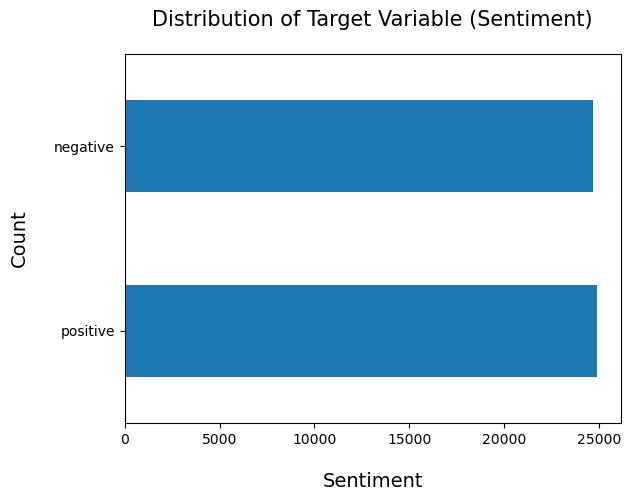

In [12]:
vc.plot(kind='barh')
plt.title('Distribution of Target Variable (Sentiment)',pad=20,fontsize=15)
plt.xlabel('Sentiment',fontsize=14,labelpad=18)
plt.ylabel('Count',fontsize=14,labelpad=18)
plt.show()

***
# ***Applying NLP Preprocessing Techniques***
For each row, we're gonna preprocess the text by removing stopwords, punctuation, and converting the text to lowercase. We're also gonna tokenize the text and lemmatize it. We're gonna use the WordNetLemmatizer from the nltk library.

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
# Taking an example text for analyzing the preprocessing method to use
text = df.iloc[1, 0]

text

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

### ***Removing the HTML markdown tags***

In [15]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# For removing the HTML markdown tags (such as those present in text above)
def remove_html_tags(text):
    pattern = re.compile("<.*?>")
    return pattern.sub(r"", text)

mkd_removed_text = remove_html_tags(text)
mkd_removed_text

[nltk_data] Downloading package stopwords to C:\Users\Malaika
[nltk_data]     ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

### ***Converting into lowercase***

In [16]:
# Now, converting into lowercase
mkd_removed_text = mkd_removed_text.lower()
mkd_removed_text

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

### ***Removing URL Links***

In [17]:
# For removing any type of links present in the text

#For removing URL links
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

### ***Removing Punctuation Marks***

In [18]:
# Now, removing the punctuation marks
punctuation_marks = string.punctuation

def remove_punctuations(text):
    for punctuation in punctuation_marks:
        text = text.replace(punctuation, "")
    return text

In [19]:
mkd_url_removed =  remove_url(mkd_removed_text)
mkd_punct_removed = remove_punctuations(mkd_url_removed)

print(mkd_punct_removed)

a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done


### ***Removing Stop Words***

In [20]:
# Now, finally removing the stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

mkd_stopwords_removed = remove_stopwords(mkd_punct_removed)
print(mkd_stopwords_removed)

wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done


In [21]:
#Now that we've decided how to pre-process each line, we will do it for all the reviews present
def preprocess_text(text):
    text = remove_html_tags(text)
    text = text.lower()
    text = remove_url(text)
    text = remove_punctuations(text)
    text = remove_stopwords(text)
    return text

In [22]:
no_rows = df.shape[0]
for i in range(no_rows):
    df.iloc[i, 0] = preprocess_text(df.iloc[i, 0])

In [23]:
df


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,im going disagree previous comment side maltin...,negative


Data has been successfully pre-processed. Now, preparing the data for training the model.on

***
# ***Model Training***

Since we're tackling with text-based data, we will have to use the bag-of-words model, utilizing techniques such as TF vectorization

In [24]:
X = df['review']
Y = df['sentiment']

In [25]:
# LabelEncoder to convert categorical sentiment labels into numerical values
le = LabelEncoder()

# Fit the LabelEncoder on the sentiment labels and transform them into numerical values
Y_enc = le.fit_transform(Y)

In [26]:
# Split the dataset into training and testing sets
# 'test_size=0.25' means 25% of the data will be used for testing, and 75% for training
# 'random_state=42' ensures reproducibility of the split

x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size = 0.25, random_state = 42)

In [27]:
# Initialize the CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()

# Fit the CountVectorizer to the training data and transform the training data into a feature matrix
x_train = vectorizer.fit_transform(x_train)

# Transform the test data into a feature matrix using the fitted CountVectorizer
x_test = vectorizer.transform(x_test)

In [28]:
# Save the fitted CountVectorizer for future use
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

***
# ***Model Development***
### ***Using ML models***

In [29]:
# Initializing Naive Bayes models

mn = MultinomialNB()
bn = BernoulliNB()

In [30]:
# MultinomialNB

mn.fit(x_train, y_train)
mn_pred_test = mn.predict(x_test)
mn_pred_train = mn.predict(x_train)

In [31]:
# BernoulliNB

bn.fit(x_train, y_train)
bn_pred_test = bn.predict(x_test)
bn_pred_train = bn.predict(x_train)

In [32]:
# Logistic Regression
# Initializing Logistic Regression model

lr = LogisticRegression()

In [33]:
# Training the model

lr.fit(x_train, y_train)
lr_pred_test = lr.predict(x_test)
lr_pred_train = lr.predict(x_train)

In [34]:
# Logistic Regression Test Accuracy
lr_acc_test = accuracy_score(y_test, lr_pred_test)

#MultinomialNB Test Accuracy
mn_acc_test = accuracy_score(y_test, mn_pred_test)

#BernoulliNB Test Accuracy
bn_acc_test = accuracy_score(y_test, bn_pred_test)

***
# ***Model Evaluation***

In [35]:
print("Accuracy score of Model Using Logistic Regression",lr_acc_test)
print("Accuracy score of Model Using MultinomialNB ",mn_acc_test)
print("Accuracy score of Model Using BernoulliNB ",bn_acc_test)

Accuracy score of Model Using Logistic Regression 0.8823007421748952
Accuracy score of Model Using MultinomialNB  0.856405292029687
Accuracy score of Model Using BernoulliNB  0.8556792513714101


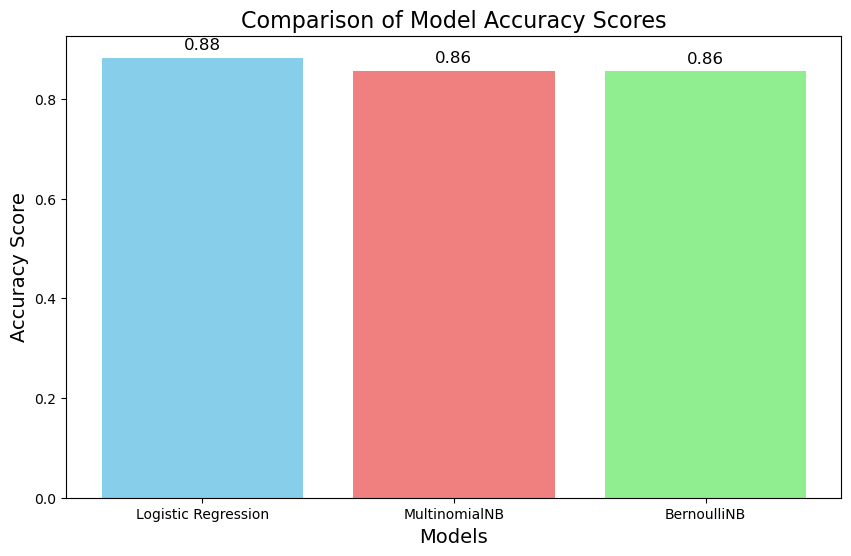

In [36]:
# Define the accuracy scores for different models
accuracy_scores = {
    'Logistic Regression': lr_acc_test,
    'MultinomialNB': mn_acc_test,
    'BernoulliNB': bn_acc_test
}

# Extracting model names and their corresponding accuracy scores
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Creating a bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
bars = plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen'])

# Adding labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Comparison of Model Accuracy Scores', fontsize=16)

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)


plt.show()


***
## ***Saving all the models for future use***


In [37]:
# joblib.dump(): This function is used to save the model object to a file. It takes two arguments:
# The model object to be saved (e.g., lr, mn, bn).
# The filename where the model will be saved (e.g., "lr_model.pkl").

joblib.dump(lr, "lr_model.pkl")  #Logistic Regression Model
joblib.dump(mn, "mn_model.pkl")  #Multinomial Naive Bayes Model
joblib.dump(bn, "bn_model.pkl")  #Bernoulli Naive Bayes Model
 

['bn_model.pkl']

***
# ***Checking the ML model on user's input***

In [43]:
inp = "I love this movie!"

# Preprocessing the input text
inp = preprocess_text(inp)

# Convert the text to a numerical format using a previously fitted vectorizer
# transform([inp]) converts the preprocessed text into a feature vector. 
# The input text is wrapped in a list because transform expects an iterable of texts.
inp = vectorizer.transform([inp])


# user_pred_lr = lr.predict(inp): This line uses the trained Logistic Regression model (lr) to make a prediction based on the transformed input features.
user_pred_lr = lr.predict(inp)
print(user_pred_lr[0])

1


### ***1 in the output shows positive sentiment***

In [45]:
inp2= "Hating the movie"

# Preprocessing the input text
inp2 = preprocess_text(inp2)

# Convert the text to a numerical format using a previously fitted vectorizer
# transform([inp]) converts the preprocessed text into a feature vector. 
# The input text is wrapped in a list because transform expects an iterable of texts.
inp2 = vectorizer.transform([inp2])


# user_pred_lr = lr.predict(inp): This line uses the trained Logistic Regression model (lr) to make a prediction based on the transformed input features.
user2_pred_lr = lr.predict(inp2)
print(user2_pred_lr.dtype)
print(user2_pred_lr[0])

int32
0


### ***0 in the output shows positive sentiment***
***
***